In [40]:
from cntools.datasets import Dataset
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import pearsonr,spearmanr
from sklearn.cross_decomposition import CCA
import networkx as nx
import seaborn as sns
import pickle
import matplotlib as mpl
import sys
from general import cns_remap
import os
sys.path.insert(0, '..')
plt.rcParams["font.family"] = 'Arial'

In [41]:
patient_col = 'Sample'
image_col = 'Image'
neigh_col = 'CN'
ct_col = 'CT'

In [42]:
# CRC:

# chks = ['CD8+ICOS+', 'CD8+Ki67+', 'CD8+PD-1+', 'Treg-Ki67+']
# out_file = 'net.pdf'

# Uncomment one of these results on CRC

# ds = pickle.load(open('../data/CRC/CRC_ds_ori.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df_ori.csv')
# out_dir = '../analysis_res/CRC/CC_ori'
# nbs = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# cns = cns_remap(pickle.load(open('../cn/CRC/CC_ori/cns.pkl', 'rb')), [0, 9, 1, 2, 3, 4, 5, 6, 7, 8])
# ind = ['CN-1: T cell enriched', 'CN-2: Bulk tumor', 'CN-3: Immune-infiltrated stroma', 'CN-4: Macrophage enriched', 'CN-5: Follicle', 'CN-6: Tumor boundry', 'CN-7: Vascularized smooth muscle', 'CN-8: Smooth muscle', 'CN-9: Granulocyte enriched']

# ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df.csv')
# out_dir = '../analysis_res/CRC/CC'
# nbs = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# cns = cns_remap(pickle.load(open('../cn/CRC/CC/cns_n_cns=9_m=10_naive.pkl', 'rb')), [1, 2, 6, 4, 7, 5, 3, 8, 0])
# ind = ['CN-1: T cell enriched', 'CN-2: Bulk tumor', 'CN-3: Immune-infiltrated stroma', 'CN-4: Macrophage enriched', 'CN-5: Follicle', 'CN-6: Immune cell enriched', 'CN-7: Plasma & vasc. enriched', 'CN-8: Smooth muscle', 'CN-9: Granulocyte enriched']

# ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df.csv')
# out_dir = '../analysis_res/CRC/CF-IDF'
# nbs = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# cns = cns_remap(pickle.load(open('../cn/CRC/CF-IDF/cns_n_cns=9_eps=32_r=0.8_naive.pkl', 'rb')), [3, 4, 7, 8, 0, 5, 6, 2, 1])
# ind = ['CN-1: T cell enriched', 'CN-2: Bulk tumor', 'CN-3: Immune-infiltrated stroma', 'CN-4: Macrophage enriched', 'CN-5: Mixed', 'CN-6: Undefined cell enriched', 'CN-7: Immune cell / vasc. enriched', 'CN-8: Smooth muscle', 'CN-9: Granulocyte enriched']

# ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df.csv')
# out_dir = '../analysis_res/CRC/CNE'
# nbs = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# cns = cns_remap(pickle.load(open('../cn/CRC/CNE/cns_n_cns=9_perp=15_lam=0.25_naive.pkl', 'rb')), [2, 3, 7, 1, 8, 5, 6, 0, 4])
# ind = ['CN-1: T cell enriched', 'CN-2: Bulk tumor', 'CN-3: Immune. stroma & vasc.', 'CN-4: Macrophage enriched', 'CN-5: Follicle', 'CN-6: Immune cell enriched', 'CN-7: Plasma cell enriched', 'CN-8: Smooth muscle', 'CN-9: Granulocyte enriched']

# ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df.csv')
# out_dir = '../analysis_res/CRC/Spatial LDA'
# nbs = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# cns = cns_remap(pickle.load(open('../cn/CRC/Spatial LDA/cns_n_cns=9_eps=50_b=0.025_naive.pkl', 'rb')), [8, 2, 4, 0, 7, 6, 5, 3, 1])
# ind = ['CN-1: T cell enriched', 'CN-2: Bulk tumor', 'CN-3: Immune-infiltrated stroma', 'CN-4: T cell & macrophage enriched', 'CN-5: Follicle', 'CN-6: Undefined cell enriched', 'CN-7: Macrophage, plasma cell & vasc. enriched', 'CN-8: Smooth muscle', 'CN-9: Granulocyte enriched']

# ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df.csv')
# out_dir = '../analysis_res/CRC/ClusterNet'
# nbs = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# cns = cns_remap(pickle.load(open('../cn/CRC/ClusterNet/6first_16_70.0_naive.pkl', 'rb')), [8, 1, 3, 5, 0, 4, 2, 7, 6])
# ind = ['CN-1: T cell enriched', 'CN-2: Bulk tumor', 'CN-3: Macrophage & stroma enriched', 'CN-4: Macrophage & vasc. enriched', 'CN-5: Follicle', 'CN-6: Tumor boundry', 'CN-7: Plasma cell enriched', 'CN-8: Smooth muscle', 'CN-9: Granulocyte enriched']

# ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df.csv')
# out_dir = '../analysis_res/CRC/GAP'
# nbs = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# cns = cns_remap(pickle.load(open('../cn/CRC/GAP/6first_labels_naive.pkl', 'rb')), [3, 0, 5, 2, 7, 6, 8, 1, 4])
# ind = ['CN-1: Mixed', 'CN-2: Bulk tumor & B cell enriched', 'CN-3: Mixed', 'CN-4: Macrophage enriched', 'CN-5: Mixed', 'CN-6: Tumor boundary', 'CN-7: Tumor boundary', 'CN-8: Mixed', 'CN-9: Mixed']

# T2D:

ds = pickle.load(open('../data/T2D/T2D_ds.pkl', 'rb'))
df = pd.read_csv('../data/T2D/T2D_df.csv')
nbs = [0, 1, 2, 3, 4, 5]

# chks = ['Endothelial cells', 'Pericytes'] # select which neighborhoods and functional subsets (vascular)
# out_file = 'net_vascular.pdf'

chks = ['T cells', 'Macrophages', 'Other immune cells'] # select which neighborhoods and functional subsets (immune)
out_file = 'net_immune.pdf'

df_cells = np.zeros((len(df), len(ds.ct_order)), dtype='int')
df_cells[[i for i in range(len(df))], [ds.ct_order.index(i) for i in df[ct_col]]] = 1
df[chks] = df_cells[:, [ds.ct_order.index(chk) for chk in chks]]

# Uncomment one of these results on T2D

# out_dir = '../analysis_res/T2D/CF-IDF_ori'
# cns = pickle.load(open('../cn/T2D/CF-IDF_ori/cns.pkl', 'rb'))
# ind = ['CN-1: Alpha cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Endothelial cell enriched', 'CN-4: Delta cell enriched', 'CN-5: Gamma cell enriched', 'CN-6: Macrophage enriched']

# out_dir = '../analysis_res/T2D/CC'
# cns = cns_remap(pickle.load(open('../cn/T2D/CC/cns_n_cns=6_m=5_hmrf.pkl', 'rb')), [1, 4, 0, 2, 5, 3])
# ind = ['CN-1: Alpha cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Endothelial cell enriched', 'CN-4: Delta, gamma &\nmacrophage cell enriched', 'CN-5: Alpha & beta cell enriched', 'CN-6: Alpha & mixed cell enriched']

# out_dir = '../analysis_res/T2D/CF-IDF'
# cns = cns_remap(pickle.load(open('../cn/T2D/CF-IDF/cns_n_cns=6_eps=57_r=0.5_naive.pkl', 'rb')), [0, 1, 5, 3, 4, 2])
# ind = ['CN-1: Alpha cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Endothelial cell enriched', 'CN-4: T cell enriched', 'CN-5: Other immune cell enriched', 'CN-6: Macrophage enriched']

out_dir = '../analysis_res/T2D/CNE'
cns = cns_remap(pickle.load(open('../cn/T2D/CNE/cns_n_cns=6_perp=15_lam=0.25_naive.pkl', 'rb')), [3, 1, 4, 2, 0, 5])
ind = ['CN-1: Alpha cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Endothelial cell enriched', 'CN-4: Delta cell enriched', 'CN-5: Gamma cell enriched', 'CN-6: Macrophage enriched']

# out_dir = '../analysis_res/T2D/Spatial LDA'
# cns = cns_remap(pickle.load(open('../cn/T2D/Spatial LDA/cns_n_cns=6_eps=100_b=0.25_naive.pkl', 'rb')), [2, 1, 0, 4, 3, 5])
# ind = ['CN-1: Alpha cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Endothelial cell enriched', 'CN-4: Delta cell enriched', 'CN-5: Gamma cell enriched', 'CN-6: Alpha, macrophage &\nendothelial cell enriched']

# out_dir = '../analysis_res/T2D/ClusterNet'
# cns = cns_remap(pickle.load(open('../cn/T2D/ClusterNet/6first_16_70.0_hmrf.pkl', 'rb')), [1, 2, 0, 3, 5, 4])
# ind = ['CN-1: Alpha cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Beta & endothelial cell enriched', 'CN-4: Delta cell enriched', 'CN-5: Alpha & beta cell enriched', 'CN-6: Macrophage enriched']

# out_dir = '../analysis_res/T2D/GAP'
# cns = cns_remap(pickle.load(open('../cn/T2D/GAP/6first_labels_hmrf.pkl', 'rb')), [0, 2, 4, 5, 3, 1])
# ind = ['CN-1: Alpha cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Alpha & mixed cell enriched', 'CN-4: Alpha cell enriched', 'CN-5: Alpha & beta cell enriched', 'CN-6: Macrophage enriched']


ind = [i.split(': ')[1] for i in ind]

In [43]:
df[neigh_col] = 0
for sample, df_sample in df.groupby(patient_col, sort=False):
    for image, df_image in df_sample.groupby(image_col, sort=False):
        df.loc[df_image.index, neigh_col] = cns[sample][image]
cells2 = pd.DataFrame(df, columns=chks + [ct_col, neigh_col, patient_col])
cells2

,T cells,Macrophages,Other immune cells,CT,CN,Sample
0,0,0,0,Alpha cells,1,ABI2259
1,0,0,0,Beta cells,1,ABI2259
2,0,0,0,Alpha cells,1,ABI2259
3,0,0,0,Alpha cells,1,ABI2259
4,0,0,0,Beta cells,1,ABI2259
...,...,...,...,...,...,...
66318,0,0,0,Gamma cells,4,AFCM451
66319,0,0,0,Endothelial cells,4,AFCM451
66320,0,0,0,Gamma cells,4,AFCM451
66321,0,0,0,Gamma cells,4,AFCM451


In [44]:
group_patients = ds.group2sample
groups = list(group_patients.keys())
good_patients = sorted(list(ds.sample2group.keys()))

In [45]:
all_freqs = cells2.groupby([patient_col, neigh_col])[chks].sum().reset_index()
for p in good_patients:
    for cn in nbs:
        if len(all_freqs[(all_freqs[patient_col] == p) & (all_freqs[neigh_col] == cn)]) == 0:
            all_freqs = all_freqs.append({patient_col: p, neigh_col: cn}, ignore_index=True).fillna(0)
all_freqs = all_freqs.sort_values(by=[patient_col, neigh_col]).reset_index(drop=True)

In [46]:
#work out neighborhood counts
nbd_counts = cells2.groupby([patient_col, neigh_col]).size().unstack().fillna(0).loc[good_patients]
pat_counts = cells2.groupby([patient_col]).size().fillna(0).loc[good_patients]

In [47]:
# make a df of neighborhood specific cell type densities
x = all_freqs.reset_index().iloc[:,1:]
df_list = []
for nb in nbs:
    arr = x.loc[x[neigh_col]==nb,:].set_index(patient_col).loc[good_patients,chks].values.astype('float')
    arr /= nbd_counts[nb].values[:,None]
    df_list.append(pd.DataFrame(arr, index = good_patients, columns = [chk+'_'+str(nb) for chk in chks]))
    
X_density = pd.concat(df_list, axis = 1)

X_density = np.log(1e-3+X_density.loc[:, X_density.apply(np.std,axis = 0)>0])

/var/folders/hs/ljx_n2857y7g_lhq6hrr4dlw0000gn/T/ipykernel_1808/2599421188.py:6: RuntimeWarning: invalid value encountered in true_divide
  arr /= nbd_counts[nb].values[:,None]


In [48]:
cca = CCA(n_components=1,max_iter = 1000)
def do_cca( n_perms,fun = 'pearson'):
    if fun == 'pearson':
        func = pearsonr
    if fun == 'spearman':
        func = spearmanr
    
    cols = [chk + '_' for chk in chks]
    stats = {}
    for gp in groups:
        stats[gp] = {}
        for k,nb1 in enumerate(nbs):
            for l,nb2 in enumerate(nbs):
                if (k<l):
                    nb1_cols = [c +str(nb1) for c in cols]
                    nb2_cols = [c +str(nb2) for c in cols]
                    dat = X_density.reindex(group_patients[gp], columns=nb1_cols+nb2_cols).dropna(axis = 1, how = 'all').dropna(axis = 0, how = 'any')
                    
                    a = dat.loc[:,[n for n in nb1_cols if n in dat.columns]].values
                    b = dat.loc[:,[n for n in nb2_cols if n in dat.columns]].values
                    if (len(a)<2) or (a.shape[1]<1) or (b.shape[1]<1):
                        print('continuing',nb1,nb2)
                        continue

    
                    x,y = cca.fit_transform(a,b)
                    arr = np.zeros(n_perms)
                    #compute the canonical correlation
                    stats[gp][nb1,nb2] = (func(x.squeeze(),y.squeeze())[0],arr)
                    for i in range(n_perms):
                        idx = np.arange(len(a))
                        np.random.shuffle(idx)
                        #compute over n_perms permutations
                        xt,yt = cca.fit_transform(a[idx],b)
                        arr[i] = func(xt.squeeze(),yt.squeeze())[0]
        print(gp, 'done')


    return stats

In [49]:
np.random.seed(145)
stats = do_cca(n_perms=5000, fun='pearson') # pickle.load(open(f'{out_dir}/net_stats_perp=15.pkl', 'rb'))

ND done
T2D done


In [50]:
def draw_stats(stats_treg,cutoff = 0.1):
    g1 = nx.Graph()
    g2 = nx.Graph()
    for k,nb1 in enumerate(nbs):
        for l,nb2 in enumerate(nbs):
            if (k<l):
                if (nb1, nb2) in stats_treg[groups[0]]:
                    p1 = np.mean(stats_treg[groups[0]][(nb1,nb2)][1]<stats_treg[groups[0]][(nb1,nb2)][0])
                    if (1-p1)<cutoff:
                        g1.add_edge(nb1,nb2,weight = 1-p1)
                        print('gp1',nb1,nb2,p1)
                if (nb1, nb2) in stats_treg[groups[1]]:        
                    p2 = np.mean(stats_treg[groups[1]][(nb1,nb2)][1]<stats_treg[groups[1]][(nb1,nb2)][0])
                    if (1-p2)<cutoff:
                        g2.add_edge(nb1,nb2,weight = 1-p2)
                        print('gp2',nb1,nb2,p2)

    for i in nbs:
        g1.add_node(i)
        g2.add_node(i)

    nx.draw_networkx(g1) 
    plt.axis('off')
    plt.show()

    nx.draw_networkx(g2)
    plt.axis('off')
    plt.show()
    return g1,g2

gp2 0 2 0.997
gp2 0 4 0.9366
gp1 1 5 0.9174
gp1 3 5 0.9952


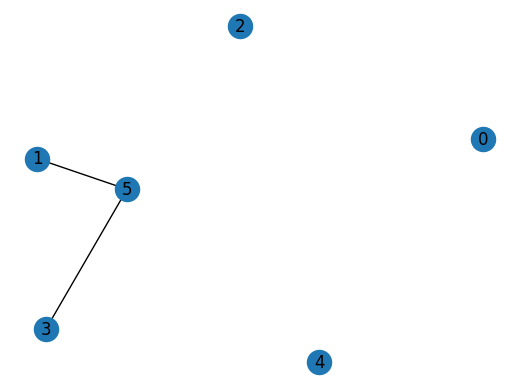

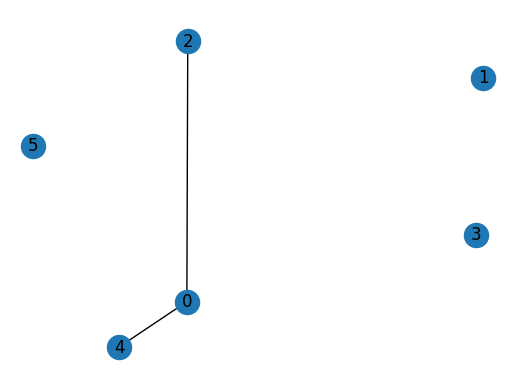

In [51]:
g1, g2 = draw_stats(stats)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

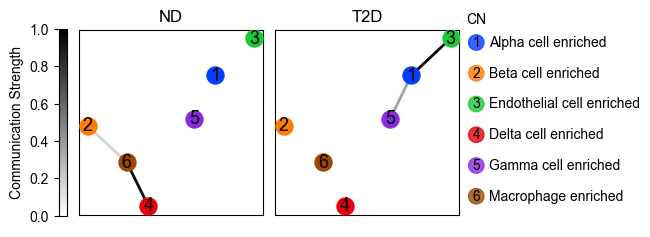

In [52]:
fig = plt.figure(figsize=(4, 2.25))

pal = sns.color_palette('bright',10)
dash = {True: '-', False: ':'}
g_comb = g1.copy()
for source,dest in g2.edges:
    g_comb.add_edge(source,dest)
pos = nx.drawing.nx_pydot.pydot_layout(g_comb,prog='neato')
# pos = pickle.load(open(f'{out_dir}/net_pos_perp=15.pkl', 'rb'))

ax = fig.add_subplot(121)
for k,v in pos.items():
    x,y = v
    ax.scatter([x], [y], c=pal[k], s=150, zorder=3)
    ax.text(x, y, k+1, fontsize=13, zorder=5, ha='center', va='center')

atrs = nx.get_edge_attributes(g1, 'weight')    
for e0,e1 in g1.edges():
    p = atrs[e0,e1]
    ax.plot([pos[e0][0], pos[e1][0]], [pos[e0][1],pos[e1][1]], c='black', alpha = 1-10*p, linewidth=2)

plt.xticks([])
plt.yticks([])
plt.title(groups[0])

bx = fig.add_subplot(122)
for k,v in pos.items():
    x,y = v
    bx.scatter([x], [y], c=pal[k], s=150, zorder=3)
    bx.text(x, y, k+1, fontsize=13, zorder=5, ha='center', va='center')
atrs = nx.get_edge_attributes(g2, 'weight')    
for e0,e1 in g2.edges():
    p = atrs[e0,e1]
    bx.plot([pos[e0][0],pos[e1][0]],[pos[e0][1],pos[e1][1]], c='black', alpha = 1-10*p, linewidth=2)

plt.xticks([])
plt.yticks([])
plt.title(groups[1])

ax2 = fig.add_axes([-0.02, 0.05, 0.02, 0.83])
cmap = mpl.cm.binary
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cbar = mpl.colorbar.ColorbarBase(ax=ax2, cmap=cmap, norm=norm, ticks=[0], orientation='vertical')
ax2.yaxis.set_ticks_position('left')
ax2.yaxis.set_label_position('left')
ax2.yaxis.set_ticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_ylabel('Communication Strength')

ax3 = fig.add_axes([1, 0, 0.02, 0.82])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.get_xaxis().set_ticks([])
ax3.get_yaxis().set_ticks([])
for i,k in enumerate(nbs):
    ax3.annotate(f'{k+1}', (1.2, 1 - 1/len(nbs)*i), bbox={'boxstyle': 'circle', 'color': sns.color_palette('bright')[k], 'pad': 0.05, 'alpha': 0.8}, annotation_clip=False, va='center', ha='center') # 0.11
    ax3.annotate(ind[i], (2.8, 1 - 1/len(nbs)*i), annotation_clip=False, va='center')
ax3.annotate('CN', (1.2, 1.1), annotation_clip=False, ha='center')

# ax3.set_title('CNE', x=-33, y=1.1, loc='left')
plt.tight_layout(pad=0.55)
plt.show()

fig.savefig(os.path.join(out_dir, out_file), bbox_inches='tight')
# pickle.dump(stats, open(f'{out_dir}/net_stats.pkl', 'wb'))
# pickle.dump(pos, open(f'{out_dir}/net_pos.pkl', 'wb'))